# Análises

**Bibliotecas importadas**

In [1]:
from time import sleep
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/labfis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/tmp/ipykernel_4019/4291788097.py:3: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [3]:
plt.style.use('seaborn')
plt.rcParams["font.family"] = "serif"

## Importação dos arquivos de dados

In [4]:
def importar_arquivos():
    src_dir = os.getcwd()
    data_dir = os.path.join(src_dir.replace('src', 'data'))

    df = pd.DataFrame()
    for f in os.listdir(data_dir):
        try:
            df = pd.concat([df, pd.read_csv(os.path.join(data_dir, f))])
        except:
            pass
    df.drop_duplicates(inplace=True)
    df['Data de Publicação'] = pd.to_datetime(df['Data de Publicação'], format='%Y-%m-%d')
    df['Palavras-chave'] = df['Palavras-chave'].fillna('')
    df = df[df['Data de Publicação'] >= '2012']
    return df

In [5]:
df = importar_arquivos()

In [6]:
qtd_artigos = df.shape[0]
print(f'Foram encontrados {qtd_artigos} artigos.')

Foram encontrados 372 artigos.


In [7]:
df.head()

,Data de Publicação,Título,Resumo,Palavras-chave,Qtd. de Autores,Autor 1,Autor 2,Autor 3,Autor 4,Autor 5,...,Afiliação 6,Url Artigo,Revista,Afilição 1,Afilição 2,Afilição 3,Afilição 4,Afilição 5,Afilição 6,url
0,2019-06-24,FATORES CONTINGENCIAIS EXTERNOS E A MENSURAÇÃO...,Objetivo: Analisar as relações entre os fatore...,Fatores contingenciais externos. Mensuração de...,2,Alan Santos de Oliveira,Antônio André Cunha Callado,NaN,NaN,NaN,...,NaN,https://www.repec.org.br/repec/article/view/1928,Revista de Educação e Pesquisa em Contabilidad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-20,INFLUÊNCIA DO DESEMPENHO ACADÊMICO NA PERCEPÇÃ...,Objetivo: Buscar evidências que permitam ident...,Justiça no Ambiente de Aprendizagem.. Ciências...,4,Karla Luisa Costa Sabino,Jacqueline Veneroso Alves da Cunha,Romualdo Douglas Colauto,José Roberto de Souza Francisco,NaN,...,NaN,https://www.repec.org.br/repec/article/view/2382,Revista de Educação e Pesquisa em Contabilidad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-01,INSERÇÃO DO TEMA SUSTENTABILIDADE NO CURSO DE ...,Objetivo: compreender o processo de institucio...,Teoria Institucional. Sustentabilidade. Ensino...,3,Karina Rocha Henriques Gehlen,Luciano Gomes dos Reis,Kelli Juliane Favato,NaN,NaN,...,NaN,https://www.repec.org.br/repec/article/view/2666,Revista de Educação e Pesquisa em Contabilidad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2013-10-14,PERFIL DOS ARTIGOS QUE UTILIZARAM A ESTRATÉGIA...,Este estudo objetiva identificar o perfil dos ...,,2,Ilse Maria Beuren,Rosemar José Hall,NaN,NaN,NaN,...,NaN,https://portalperiodicos.unoesc.edu.br/race/ar...,"Revista de Administração, Contabilidade e Econ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-29,EVIDENCIAÇÃO AMBIENTAL VOLUNTÁRIA DE COMPANHIA...,O estudo objetivou analisar quais informações ...,,4,Francisca Francivânia Rodrigues Ribeiro Macêdo,Geovanne Dias de Moura,Vanderlei Gollo,Roberto Carlos Klann,NaN,...,NaN,https://portalperiodicos.unoesc.edu.br/race/ar...,"Revista de Administração, Contabilidade e Econ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['Data de Publicação', 'Título', 'Resumo', 'Palavras-chave',
       'Qtd. de Autores', 'Autor 1', 'Autor 2', 'Autor 3', 'Autor 4',
       'Autor 5', 'Autor 6', 'Afiliação 1', 'Afiliação 2', 'Afiliação 3',
       'Afiliação 4', 'Afiliação 5', 'Afiliação 6', 'Url Artigo', 'Revista',
       'Afilição 1', 'Afilição 2', 'Afilição 3', 'Afilição 4', 'Afilição 5',
       'Afilição 6', 'url'],
      dtype='object')

## Autores

In [9]:
df['Qtd. de Autores'].describe()

count    372.000000
mean       3.056452
std        1.134861
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Qtd. de Autores, dtype: float64

In [10]:
qtd_autores_media = df['Qtd. de Autores'].mean()
qtd_autores_min = df['Qtd. de Autores'].min()
qtd_autores_max = df['Qtd. de Autores'].max()
qtd_autores_std = df['Qtd. de Autores'].std()

print(f'A quantidade de autores encontra-se no intervalo de 1 a 6 autores por artigo. A quantidade média foi de {qtd_autores_media:.1f} autores por artigo, com desvio padrão de {qtd_autores_std:.1f}. Aproximadamente 50% dos artigos foram escritos por 2, 3 ou 4 pesquisadores.')

A quantidade de autores encontra-se no intervalo de 1 a 6 autores por artigo. A quantidade média foi de 3.1 autores por artigo, com desvio padrão de 1.1. Aproximadamente 50% dos artigos foram escritos por 2, 3 ou 4 pesquisadores.


## Afiliação

In [11]:
def calcular_afiliacao(df):
    lista = []
    for i in range(1, 7):
        lista += df[f'Afiliação {i}'].to_list()
    lista = [_ for _ in lista if _ != '']

    afiliacao = pd.DataFrame(lista, columns=['Afiliação'])
    afiliacao_count = afiliacao.value_counts()[:10].reset_index().rename(columns={0:'Count'})
    return afiliacao_count

In [12]:
afiliacao_count = calcular_afiliacao(df)
afiliacao_count

,Afiliação,Count
0,Universidade Federal de Santa Catarina,75
1,Universidade Federal do Ceará,39
2,Universidade Federal do Paraná,37
3,Universidade Regional de Blumenau,30
4,Universidade de São Paulo,22
5,Universidade de Brasília,21
6,Universidade Federal de Uberlândia,20
7,Universidade Federal de Minas Gerais,17
8,Fucape Business School,17
9,Universidade Federal de Pernambuco,14


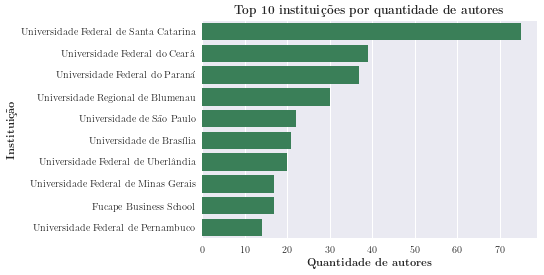

In [13]:
ax = sns.barplot(y='Afiliação', x='Count', data=afiliacao_count, color='seagreen')
ax.set_ylabel(r'\textbf{Instituição}')
ax.set_xlabel(r"\textbf{Quantidade de autores}")
ax.set_title(r'\textbf{Top 10 instituições por quantidade de autores}')
plt.xticks()
plt.savefig('../img/top10_instituicoes.png', dpi = 150, bbox_inches='tight')
plt.show()


## Nuvem de palavras

In [14]:
palavras_chave = []
for item in df['Palavras-chave'].to_list():
    aux = item.split('.')
    palavras_chave += [_.strip() for _ in aux if _ != '']

    
palavras_df = pd.DataFrame(palavras_chave, columns=['Palavras'])
palavras_count = palavras_df.value_counts()[:10].reset_index().rename(columns={0:'Count'})
palavras_count.to_csv('../palavras_mais_frequentes.csv', index=False)
palavras_count

,Palavras,Count
0,Sustentabilidade,23
1,Contabilidade,11
2,Contabilidade Ambiental,10
3,Gestão Ambiental,10
4,Evidenciação,10
5,Disclosure,8
6,Relato Integrado,7
7,Relatório de Sustentabilidade,7
8,Balanço Social,6
9,Divulgação,6


In [15]:
comment_words = ''
stopwords = set(stopwords.words('portuguese'))

In [16]:
for val in df['Palavras-chave']:
    val = str(val.replace('.', ''))
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()  

    comment_words += " ".join(tokens)+" "

In [17]:
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 6).generate(comment_words)

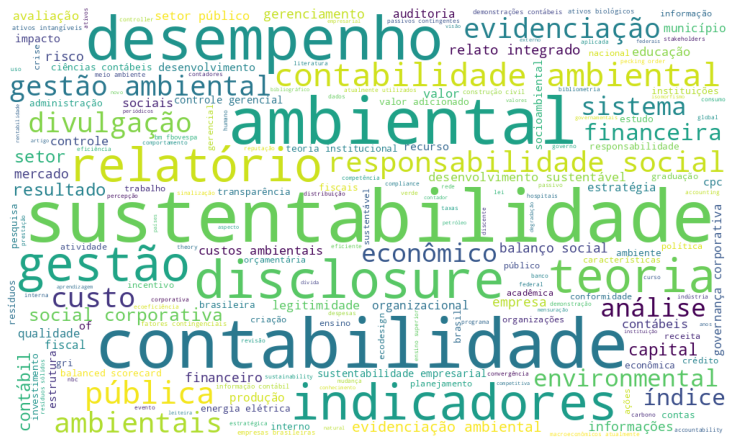

In [18]:
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('../img/nuvem.png', dpi = 150, bbox_inches='tight')

plt.show()

## Artigos por ano

In [19]:
artigos_ano = df['Data de Publicação'].groupby([df['Data de Publicação'].dt.year]).agg('count')

In [20]:
artigos_ano

Data de Publicação
2012    26
2013    31
2014    50
2015    39
2016    47
2017    36
2018    28
2019    43
2020    40
2021    32
Name: Data de Publicação, dtype: int64

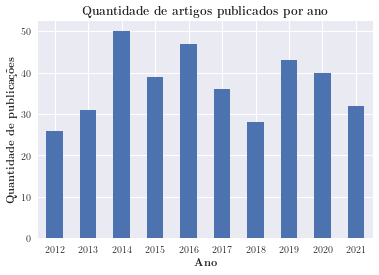

In [21]:
ax = artigos_ano.plot.bar()
ax.set_xlabel(r'\textbf{Ano}')
ax.set_ylabel(r'\textbf{Quantidade de publicações}')
ax.set_title(r'\textbf{Quantidade de artigos publicados por ano}')
plt.xticks(rotation=0)
plt.savefig('../img/artigos_por_ano.png', dpi = 150, bbox_inches='tight')

plt.show()

In [22]:
artigos_ano.describe()

count    10.000000
mean     37.200000
std       8.038795
min      26.000000
25%      31.250000
50%      37.500000
75%      42.250000
max      50.000000
Name: Data de Publicação, dtype: float64

## Publicações por revista

In [23]:
revistas = df['Revista'].value_counts().reset_index()
revistas.columns = ['Revista', 'Qtd. de Publicações']
revistas['Revista'] = revistas['Revista'].str.replace('&', 'e')
revistas.to_csv('../revistas.csv', index=False)
revistas

,Revista,Qtd. de Publicações
0,Revista de Contabilidade e Organizações – RCO,56
1,Revista Ambiente Contábil,45
2,"Revista de Administração, Contabilidade e Econ...",39
3,Revista Mineira de Contabilidade – RMC,28
4,Revista de Contabilidade da UFBA,25
5,"Revista de Administração, Contabilidade e Sust...",23
6,Advances in Scientific and Applied Accounting ...,23
7,CAP Accounting and Management,21
8,Revista Catarinense da Ciência Contábil,20
9,ConTexto,14


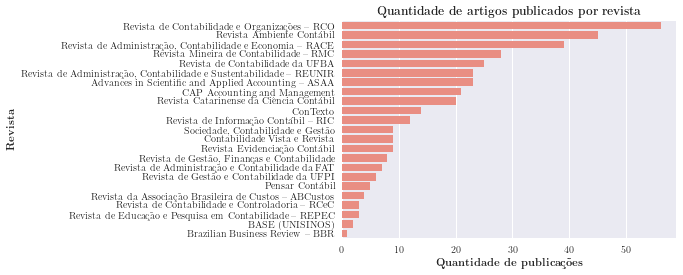

In [24]:
ax = sns.barplot(y='Revista', x='Qtd. de Publicações', data=revistas, color='salmon')
ax.set_ylabel(r'\textbf{Revista}')
ax.set_xlabel(r'\textbf{Quantidade de publicações}')
ax.set_title(r'\textbf{Quantidade de artigos publicados por revista}')
plt.xticks()
plt.savefig('../img/artigos_por_revista.png', dpi = 150, bbox_inches='tight')

plt.show()

In [25]:
df2 = df = importar_arquivos()
df2.shape

(372, 26)

In [26]:
df2.dropna()

,Data de Publicação,Título,Resumo,Palavras-chave,Qtd. de Autores,Autor 1,Autor 2,Autor 3,Autor 4,Autor 5,...,Afiliação 6,Url Artigo,Revista,Afilição 1,Afilição 2,Afilição 3,Afilição 4,Afilição 5,Afilição 6,url
